VALIAU Virgile

DESCARPENTRIES Rémy

# SIMULATIONS DE VARIABLES ALEATOIRES

# 1. A partir de l’inverse généralisée de la fonction de répartition

In [1]:
import math
import numpy as np
from scipy.stats import uniform
from scipy.stats import cauchy
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
lbd = 2
nbEch = 10000
U = uniform.rvs(loc = 0.0, scale = 1.0, size = nbEch)

In [3]:
def inv_F(u, lbd):
    return -(1/lbd)*np.log(1-u)

X = inv_F(U, lbd)

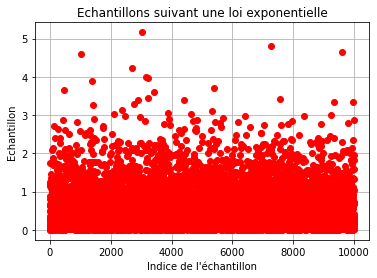

In [4]:
plt.plot(X, 'ro')
plt.title('Echantillons suivant une loi exponentielle')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Echantillon')
plt.grid()
plt.show()

In [5]:
x = np.arange(0,4,0.01)
f = lbd*np.exp(-lbd*x)

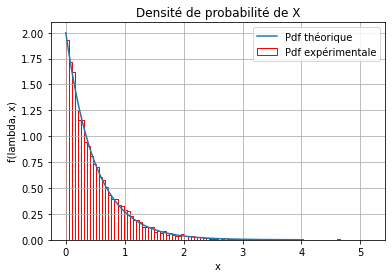

In [6]:
plt.plot(x, f, label = 'Pdf théorique')
plt.hist(X, bins = 100, density = True, color = 'white', edgecolor = 'red',label = 'Pdf expérimentale')
plt.title('Densité de probabilité de X')
plt.xlabel('x')
plt.ylabel('f(lambda, x)')
plt.grid()
plt.legend()
plt.show()

Cette méthode nécessite de connaître l'inverse généralisée de F. Ceci est le principal inconvénient de la méthode.

# 2. Méthode Accept - Reject

## Loi normale de moyenne nulle

In [7]:
M = 5
nbEch = 10000
X=np.zeros(shape = nbEch)

def g(x):
    return 1/(np.pi*(1+x**2))

In [8]:
for i in range(0, nbEch, 1):
    u = uniform.rvs(loc = 0.0, scale = 1.0, size = 1)
    x = cauchy.rvs(loc = 0.0, scale = 1.0, size = 1)
    while (norm.pdf(x = x, loc = 0, scale = 1)/(M*cauchy.pdf(x=x, loc=0, scale = 1)))<u:
        u = uniform.rvs(loc = 0.0, scale = 1.0, size = 1)
        x = cauchy.rvs(loc = 0.0, scale = 1.0, size = 1)
    X[i]=x

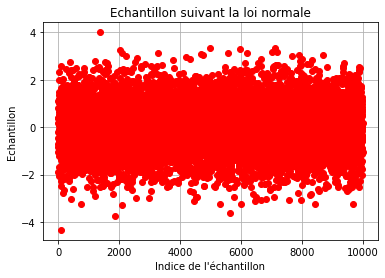

In [9]:
plt.plot(X, 'ro')
plt.title('Echantillon suivant la loi normale')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Echantillon')
plt.grid()
plt.show()

In [10]:
x = np.arange(-4,4,0.01)
f = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

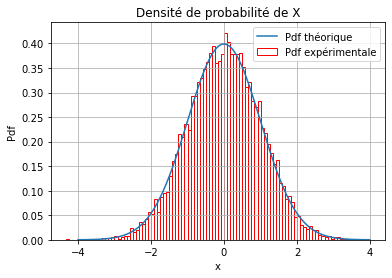

In [11]:
plt.plot(x, f, label = 'Pdf théorique')
plt.hist(X, bins = 100, density = True, color = 'white', edgecolor = 'red',label = 'Pdf expérimentale')
plt.title('Densité de probabilité de X')
plt.xlabel('x')
plt.ylabel('Pdf')
plt.grid()
plt.legend()
plt.show()

## Loi normale de moyenne 5

In [12]:
M = 5
nbEch = 10000
X=np.zeros(shape = nbEch)

def g(x):
    return 1/(np.pi*(1+x**2))

In [13]:
for i in range(0, nbEch, 1):
    u = uniform.rvs(loc = 0.0, scale = 1.0, size = 1)
    x = cauchy.rvs(loc = 5.0, scale = 1.0, size = 1)
    while (norm.pdf(x = x, loc = 5, scale = 1)/(M*cauchy.pdf(x=x, loc=5, scale = 1)))<u:
        u = uniform.rvs(loc = 0.0, scale = 1.0, size = 1)
        x = cauchy.rvs(loc = 5.0, scale = 1.0, size = 1)
    X[i]=x

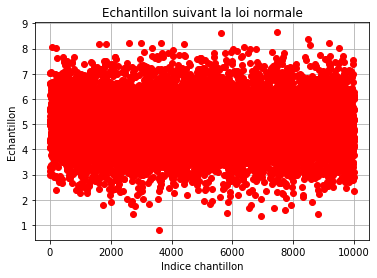

In [14]:
plt.plot(X, 'ro')
plt.title('Echantillon suivant la loi normale')
plt.xlabel('Indice chantillon')
plt.ylabel('Echantillon')
plt.grid()
plt.show()

In [15]:
x = np.arange(0,10,0.01)
f = (1/np.sqrt(2*np.pi))*np.exp(-(x-5)**2/2)

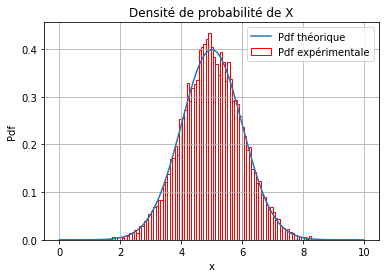

In [16]:
plt.plot(x, f, label = 'Pdf théorique')
plt.hist(X, bins = 100, density = True, color = 'white', edgecolor = 'red',label = 'Pdf expérimentale')
plt.title('Densité de probabilité de X')
plt.xlabel('x')
plt.ylabel('Pdf')
plt.grid()
plt.legend()
plt.show()

# 3. Méthode de Box-Muller pour des lois normales univariées


In [17]:
nbEch = 10000
U1 = uniform.rvs(loc = 0.0, scale = 1.0, size = nbEch)
U2 = uniform.rvs(loc = 0.0, scale = 1.0, size = nbEch)
R = -np.log(U1)
V = 2*np.pi*U2
z1 = np.sqrt(R)*np.cos(V)
z2 = np.sqrt(R)*np.sin(V)

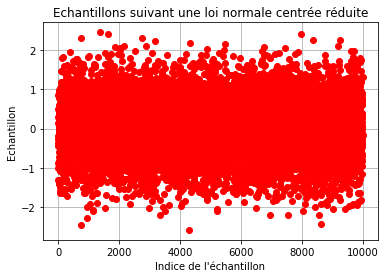

In [18]:
plt.plot(z1, 'ro')
plt.title('Echantillons suivant une loi normale centrée réduite')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Echantillon')
plt.grid()
plt.show()

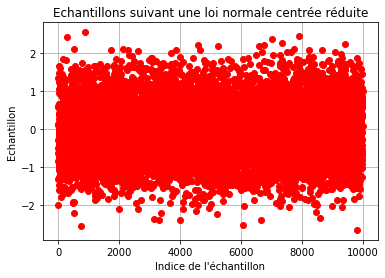

In [19]:
plt.plot(z2, 'ro')
plt.title('Echantillons suivant une loi normale centrée réduite')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Echantillon')
plt.grid()
plt.show()

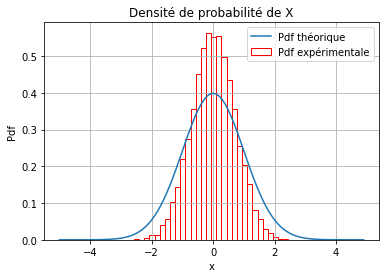

In [20]:
x=np.arange(-5, 5, 0.1)
f = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
plt.plot(x, f, label = 'Pdf théorique')
plt.hist(z1, bins = 30, density = True, color = 'white', edgecolor = 'red',label = 'Pdf expérimentale')
plt.title('Densité de probabilité de X')
plt.xlabel('x')
plt.ylabel('Pdf')
plt.grid()
plt.legend()
plt.show()

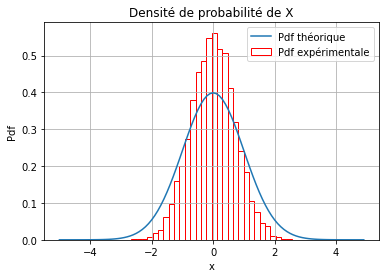

In [21]:
plt.plot(x, f, label = 'Pdf théorique')
plt.hist(z2, bins = 30, density = True, color = 'white', edgecolor = 'red',label = 'Pdf expérimentale')
plt.title('Densité de probabilité de X')
plt.xlabel('x')
plt.ylabel('Pdf')
plt.grid()
plt.legend()
plt.show()

Avec la méthode de Box-Muller, la coïncidence de la courbe et de l'histogramme est moins satisfaisante qu'avec la méthode Accept - Reject. En effet, la densité de probabilité expérimentale donne davantage d'importance aux valeurs proches de la moyenne.

# 4. Générer des échantillons d’une loi normale multivariée

In [22]:
mu = np.array([0,50,100,50,100,200]).reshape(-1,1)

sigma = np.array([[11, 10, 5, 9, 4, 2],
              [10, 13, 9, 15, 5, 3],
              [5, 9, 15, 11, 3, 1],
              [9, 15, 11, 21, 6, 4],
              [4, 5, 3, 6, 5, 1],
              [2, 3, 1, 4, 1, 1]])
                 
nbEch = 1000
Z1 = norm.rvs(loc = 0.0, scale = 1.0, size = 1000)
Z2 = norm.rvs(loc = 0.0, scale = 1.0, size = 1000)
Z3 = norm.rvs(loc = 0.0, scale = 1.0, size = 1000)
Z4 = norm.rvs(loc = 0.0, scale = 1.0, size = 1000)
Z5 = norm.rvs(loc = 0.0, scale = 1.0, size = 1000)
Z6 = norm.rvs(loc = 0.0, scale = 1.0, size = 1000)
Z = np.array([Z1, Z2, Z3, Z4, Z5, Z6])

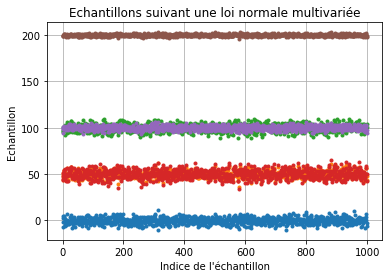

In [23]:
A = np.linalg.cholesky(sigma)
X = mu + A.dot(Z)
for i in range (6):
    plt.plot(X[i], '.')
plt.title('Echantillons suivant une loi normale multivariée')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Echantillon')
plt.grid()
plt.show()

Les différences entre les amplitudes des variations des composantes s'expliquent par les différences de covariance. En effet, la composante située à une moyenne de 200 possède des covariances relativement plus faible que les autres composantes. Ainsi, les variations de cette composante ont une amplitude plus faible.

# 5. Echantillonner suivant une loi de Bernouilli

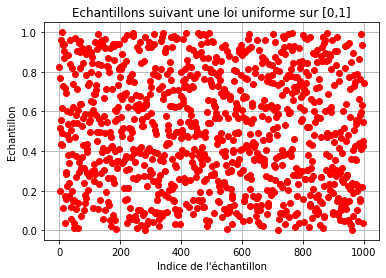

In [24]:
nbEch = 1000
U = uniform.rvs(loc = 0.0, scale = 1.0, size = nbEch)

plt.plot(U, 'ro')
plt.title('Echantillons suivant une loi uniforme sur [0,1]')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Echantillon')
plt.grid()
plt.show()

In [25]:
ber = (U>0.7)*1
print ('Frequence du nombre de zéros générés : ', len(ber[ber==0])/len(ber))

Frequence du nombre de zéros générés :  0.699


Le fréquence du nombre de zéros générés est très proche de la valeur de p.

# 6. Les méthodes Monte Carlo Markov Chain : MCMC

## Avec une loi de proposition suivant une loi uniforme sur [-1, 1]

In [26]:
nbEchantillon = 20000
nbChauffe = 500
q = uniform
f = norm
x0 = uniform.rvs(loc = -1, scale = 2, size = 1)
X = np.zeros(shape = nbEchantillon)

In [27]:
x = x0
y = uniform.rvs(loc = -1, scale = 2, size = 1)
for t in range (0, nbEchantillon + nbChauffe, 1):
    rho = min((f.pdf(y, loc = 0, scale = 1)/f.pdf(x, loc = 0, scale = 1)),1)
    u = uniform.rvs(loc = 0, scale = 1, size = 1)
    if u < rho:
        x = y
    if t >= nbChauffe :
        X[t-nbChauffe] = x
    y = uniform.rvs(loc = -1, scale = 2, size =1)

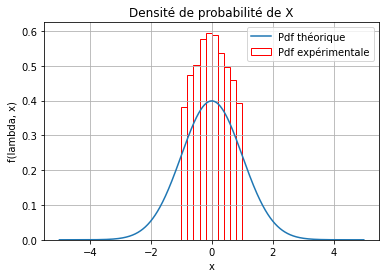

In [28]:
l = np.arange(-5,5,0.01)
f = (1/np.sqrt(2*np.pi))*np.exp(-l**2/2)
plt.plot(l, f, label = 'Pdf théorique')
plt.hist(X, bins = 10, density = True, color = 'white', edgecolor = 'red',label = 'Pdf expérimentale')
plt.title('Densité de probabilité de X')
plt.xlabel('x')
plt.ylabel('f(lambda, x)')
plt.grid()
plt.legend()
plt.show()

La densité de la loi de proposition étant nulle en dehors de l'intervalle [-1, 1], la densité expérimentale ne prend des valeurs non nulles que sur cet intervalle. Ainsi, cette courbe est au-dessus de la gaussienne sur l'intervalle [-1, 1] afin d'avoir une aire sous la courbe égale à 1. La densité expérimentale n'est donc pas une approximation satisfaisante de la densité théorique. Afin d'avoir une meilleure approximation, il est nécessaire d'avoir une loi de proposition donc le support est plus étendu. Typiquement, comme la densité d'une variable aléatoire suivant une loi normale centrée réduite prend des valeurs très proche de 0 au-delà de 4 en valeur absolue, il est nécessaire de prendre une loi uniforme sur [-a, a] avec a > 4. On prendra par exemple a = 20.

## Avec une loi de proposition suivant une loi uniforme sur [-20, 20]

In [29]:
nbEchantillon = 20000
nbChauffe = 1000
q = uniform
f = norm
x0 = uniform.rvs(loc = -20, scale = 40, size = 1)
X = np.zeros(shape = nbEchantillon)

In [30]:
x = x0
y = uniform.rvs(loc = -20, scale = 40, size = 1)
for t in range (0, nbEchantillon + nbChauffe, 1):
    rho = min((f.pdf(y, loc = 0, scale = 1)/f.pdf(x, loc = 0, scale = 1)),1)
    u = uniform.rvs(loc = 0, scale = 1, size = 1)
    if u < rho:
        x = y
    if t >= nbChauffe :
        X[t-nbChauffe] = x
    y = uniform.rvs(loc = -20, scale = 40, size =1)

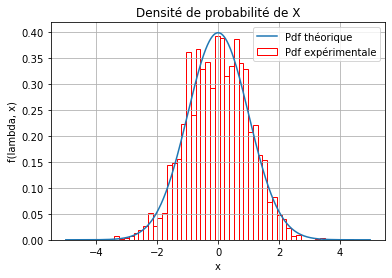

In [31]:
l = np.arange(-5,5,0.01)
f = (1/np.sqrt(2*np.pi))*np.exp(-l**2/2)
plt.plot(l, f, label = 'Pdf théorique')
plt.hist(X, bins = 50, density = True, color = 'white', edgecolor = 'red',label = 'Pdf expérimentale')
plt.title('Densité de probabilité de X')
plt.xlabel('x')
plt.ylabel('f(lambda, x)')
plt.grid()
plt.legend()
plt.show()

On obtient ici une bien meilleure estimation de la densité théorique, en ayant choisi une loi de proposition dont le support est davantage étendu. Toutefois, le résultat est moins satisfaisant que la méthode Accept - Reject.

## Loi possédant deux modes

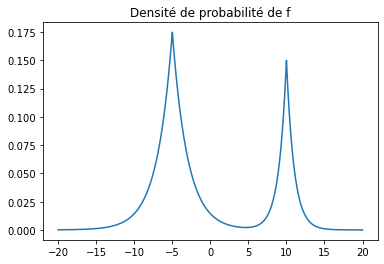

In [32]:
a1 = 1
a2 = 2
mu1 = 10
mu2 = -5
p = 0.3

laplace = lambda x,a,mu: 1/(2*a) * np.exp(-np.abs((x-mu)/a))

def f(x):
    return p*laplace(x,a1,mu1) + (1-p)*laplace(x,a2,mu2)

t=np.linspace(-20,20,10000)
F=[f(i) for i in t]
plt.plot(t,F)

plt.title('Densité de probabilité de f')
plt.show()

In [33]:
def MCMC_norm(f,a,b,burn_in = 1000,nb_histo = 50):
    q = lambda : norm.rvs(loc = a ,scale = b-a,size = 1)

    N_ech = 20000
    t = 0
    t0 = burn_in

    x = q()
    X=[]
    y = q()
    for t in range(N_ech + t0):
        rho = min(f(y)/f(x),1)
        u = uniform.rvs(loc= 0. ,scale= 1.0 ,size=1)
        if u < rho:
            x = y
        if t >= t0:
            X.append(x)
        t += 1
        y = q()

    X=np.array(X)
    plt.hist(X,bins = nb_histo,density = True,edgecolor='red',color='white',label='Expérimentale')
       
    t=np.linspace(a,b,10000)
    plt.plot(t,f(t),label = 'Théorique')
    plt.legend(loc='upper right',shadow='True')
    plt.show()

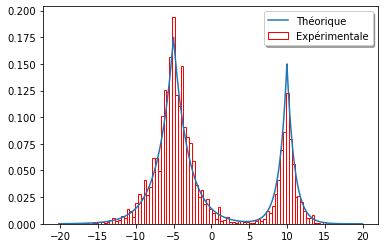

In [34]:
MCMC_norm(f,-20,20,nb_histo = 100)